# 모듈 

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 60.1 MB/s 
     |████████████████████████████████| 4.7 MB 52.0 MB/s 
     |████████████████████████████████| 365 kB 68.9 MB/s 
     |████████████████████████████████| 212 kB 74.4 MB/s 
     |████████████████████████████████| 101 kB 10.5 MB/s 
     |████████████████████████████████| 141 kB 75.8 MB/s 
     |████████████████████████████████| 596 kB 64.0 MB/s 
     |████████████████████████████████| 127 kB 57.0 MB/s 
     |████████████████████████████████| 6.6 MB 54.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# 데이터 배열화


In [3]:
# MNIST Dataset download

path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [6]:
threes =(path/'train'/'3').ls().sorted()
sevens =(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path) # Image.open => PIL library
im3

In [8]:
# 넘파이의 배열을 사용하여 숫자를 확인하거나,
array(im3)[4:10, 4:10]

# pytorch의 tensor을 사용한다.
tensor(im3)[4:10, 4:10]

# 이때 숫자는 0 ~ 255까지 채도? 명도? 를 나타낸다.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
# pandas 라이브러리를 통해 픽셀값에 맞춰 잘라낸 후 색상을 그라데이션 형태로 입힌다.
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [10]:
# 모든 자료들을 텐서로 저장
# * 리스트 컴프리헨션 학습 할 것
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

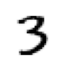

In [11]:
# 이미지 출력
show_image(three_tensors[1]) # PIL library?

In [12]:
# 스택과 동시에 부동소수로 표현
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape 
# shape는 축의 크기, rank 는 축의 갯수

torch.Size([6131, 28, 28])

In [13]:
stacked_threes.ndim
# 3차원 형태

3

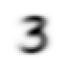

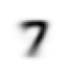

In [14]:
# 쌓아 올린 텐서들을 가지고 해당 픽셀의 평균값을 구한 뒤 하나의 이미지로 새롭게 정의한다.

# 모든 3의 픽셀값에 따른 평균 이미지 재해석
mean3 = stacked_threes.mean(0) # <- 왜 함수의 인자로 0이 들어가는가? 1, 2, -1 다 안됨
show_image(mean3)

# 모든 7의 텐서의 픽셀값에 따른 평균 이미지 재해석
mean7 = stacked_sevens.mean(0)
show_image(mean7)

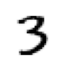

In [15]:
# 차이의 절댓값에 대한 평균 : L1 노름, 평균절대차
# 차이의 제곱에 대한 절댓값 후 제곱근 : L2 노름, 평균제곱근오차

a_3 = stacked_threes[1]
show_image(a_3)

In [16]:
dist_3_abs = (a_3 - mean3).abs().mean() # absolute
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() # squared
dist_3_abs, dist_3_sqr

# (tensor(0.1114), tensor(0.2021))

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

# (tensor(0.1586), tensor(0.3021))

(tensor(0.1586), tensor(0.3021))

In [17]:
# 손실함수로 표현하는 방법

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

# l1 손실함수, 평균제곱오차(mean squared error)에서 제곱근 사용

(tensor(0.1586), tensor(0.3021))

# difference between tensor and numpy

* 기본적으로 numpy는 c언어를 기반으로 만들어졌기 때문에 다양한 형태의 데이터를 담을 수 있고, 자료형만 같다면 다양한 모습으로 연산을 통해 배열을 만들 수 있다.

* numpy는 연산을 압축하여 메모리에 저장하기에 매우 빠른 속도를 자랑한다.

* tensor는 수치형 데이터만 사용할 수 있으며, 다양한 모습으로 변할 수 없어 항상 사각형을 유지해야 한다.

* 단, GPU에 연산을 맡길 수 있어 수 많은 양에 대한 연산이 매우 빠르게 적용하고, 자동으로 미분을 해주기도 한다.

In [18]:
data = [[12, 35, 32], [10, 39, 20]]
arr = array(data)
tns = tensor(data)

arr 
# array([[12, 35, 32], [10, 39, 20]])

tns
# tensor([[12, 35, 32], [10, 39, 20]])

tensor([[12, 35, 32],
        [10, 39, 20]])

In [19]:
# tns[행 : 열]
tns[1] # tensor([10, 39, 20]) : 인덱스 1에 해당되는 행을 들고온다. 2행

tns[:, 0] # tensor([12, 10]) : 인덱스 0에 해당되는 열을 들고온다. 모든 행에 대한 1열

tensor([12, 10])

In [20]:
tns.type() # torch.LongTensor

# 자동으로 정수형에서 부동소수로
tns = tns * 1.5
tns.type() # torch.FloatTensor

'torch.FloatTensor'

# calculate rate through broadcasting

* 학습용 데이터 셋에서만 잘 작동하는 overfit을 피하기 위해 검증용 데이터셋을 사용한다.

* 보통 정확도(accuracy)를 분류 평가지표로 사용한다.

In [21]:
# MNIST 에는 검증용 데이터셋이 따로 분류되어있다. Path('/root/.fastai/data/mnist_sample/valid')

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_3_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

# (torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

(torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

In [22]:
# 평균절대오차를 계산하는 함수

def mnist_distance(a,b) : return (a-b).abs().mean((-1, -2)) # 왜 평균에 인자를 넣어주면 브로드캐스팅이 되는가?
mnist_distance(a_3, mean3)

tensor(0.1114)

In [23]:
valid_3_dist = mnist_distance(valid_3_tens, mean3) # 검증용 데이터와 3의 평균이미지와의 오차를 구해 계산
valid_3_dist, valid_3_dist.shape

# len(valid_3_dist) == 1010

# 여기서 valid_3_tens는 rank-3에 해당되는데 mean3 는 rank-2의 테이블 형식이다.
# mnist_distance에서 텐서 간의 격차인 (a-b)에서 broadcasting이 일어난 걸 알 수 있다.

(tensor([0.1314, 0.1258, 0.1358,  ..., 0.1111, 0.1319, 0.1466]),
 torch.Size([1010]))

In [24]:
# 브로드캐스팅이란?

# numpy에서는 차원과 비슷한 개념인데 3차원과 2차원이 연산이 될 때 자동으로 2차원이 3차원으로 변형되면서 연산이 가능해지도록 해주는
# 한 마디로 자동차원(rank)변환

tensor([1,2,3]) + tensor(1) # rank-2의 테이블과 rank-1의 텐서에서 텐서가 자동으로 테이블로 조정되어 연산이 실행되었다.

tensor([2, 3, 4])

In [25]:
# mean3가 1010개 추가된 것처럼 보이지민 실제로 메모리가 할당되진 않는다.
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

In [26]:
# mean()은 그 픽셀별 뺀 값의 평균을 구해준다.

def abso(a,b) : return (a-b).abs()

image1 = abso(valid_3_tens[10], mean7)
df = pd.DataFrame(image1)
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000063,0.000120,0.000084,0.000016,0.000032,0.000040,0.000024,0.000000,0.000230,0.000363,0.000382,0.000337,0.000218,0.000121,0.000001,0.000000,0.000000,0.000000,0.000159,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000093,0.000342,0.001185,0.002433,0.004050,0.006239,0.008319,0.008828,0.241460,0.491706,0.492382,0.740226,0.991836,0.993059,0.995063,0.498460,0.500442,0.000690,0.000536,0.000295,0.000001,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000513,0.001144,0.004512,0.012454,0.023687,0.037022,0.054341,0.071389,0.413102,0.900705,0.892788,0.890547,0.889728,0.891229,0.894422,0.903822,0.920921,0.941845,0.962794,0.022864,0.011055,0.003341,0.000456,0.000011,0.000000,0.000000
7,0.000029,0.000424,0.003263,0.010402,0.028360,0.059792,0.104739,0.157012,0.214893,0.272904,0.177982,0.635939,0.607401,0.586812,0.575410,0.566296,0.064399,0.079675,0.624979,0.696615,0.789686,0.627609,0.058161,0.023271,0.004755,0.000730,0.000000,0.000000
8,0.000120,0.001743,0.011414,0.033500,0.070653,0.132629,0.211860,0.311085,0.411384,0.508958,0.340040,0.350233,0.312849,0.044588,0.214683,0.725586,0.730673,0.714450,0.147519,0.472289,0.633360,0.782817,0.105576,0.040372,0.009248,0.001138,0.000000,0.000000
9,0.000183,0.002802,0.018204,0.050405,0.101714,0.179732,0.278085,0.395733,0.510971,0.612353,0.681796,0.718202,0.720315,0.704695,0.697288,0.707309,0.740079,0.768192,0.740349,0.376116,0.563251,0.742902,0.122494,0.042672,0.008554,0.001276,0.000098,0.000128


In [27]:
# mean() 에 인자로 (-1,-2)의 튜플을 넣어주는 이유는 특정 위치의 평균만을 구하고 싶을 때 사용한다.
# tensor의 shape는 대게 [1, 40, 40] 이런 식인데 -1, -2의 인덱싱을 통해 가로 세로의 값들만 가지고 평균을 구할 때 사용한다.
# 즉 가로 세로를 가지고 구하는 값은 단 rank-1의 텐서를 가지며 이러한 텐서가 stack된 1010개를 가지고 있다. 그래서 텐서의 크기가 (1010)인 이유다.

In [28]:
# 특정 숫자의 이미지와 이상적인 숫자의 거리가 짧다면 그 숫자가 동일하다는 판단하는 함수를 가지고 학습한다.
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7) 


# 위 함수는 x에 특정 숫자를 넣었을 때 3과의 차이가 7보다 적다면(3과 거의 동일시) True를 반환한다.

is_3(valid_3_tens[10]) # True
is_3(valid_3_tens).float() # tensor([1., 1., 1.,  ..., 1., 1., 1.]) True면 1을 반환 False는 0을 반환
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean() # 1.0 == 100% 맞다..

accuracy_7s, accuracy_3s, (accuracy_7s + accuracy_3s) /2 

(tensor(1.), tensor(0.9168), tensor(0.9584))

# stochastic gradient descent 확률적 경사하강법

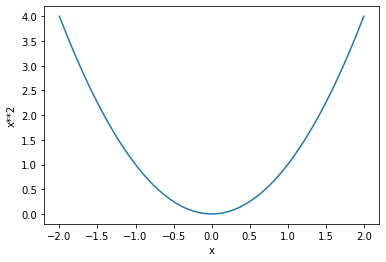

In [29]:
def f(x) : return x**2

plot_function(f, 'x', 'x**2') # function을 가지고 그래프를 표시, 2,3번째 인자는 각각 가로 세로의 태그

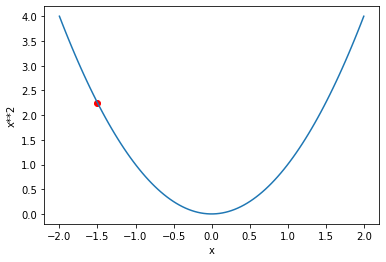

In [30]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [31]:
# 특정값의 변수에 대한 gradient를 계산해달라고 하는 함수 : requires_grad_()

xt = tensor(3.).requires_grad_() # tensor(3., requires_grad=True)

yt = f(xt)
yt.backward() # 그레디언트 계산 initialize

xt.grad

tensor(6.)

In [32]:
xt = tensor([10., 36., 25.]).requires_grad_()
xt # tensor([10., 36., 25.], requires_grad=True)

def f(x): return (x**2).sum()
yt = f(xt)
yt # 100 + 36^2 + 25^2

tensor(2021., grad_fn=<SumBackward0>)

In [33]:
# 위 예제 미분

yt.backward()
xt.grad # 기울기 2x에 값을 대입

tensor([20., 72., 50.])

4.4.2

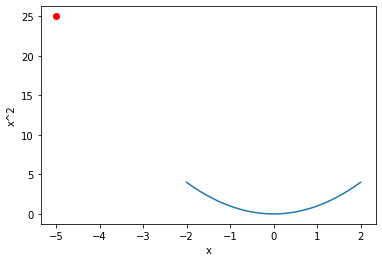

In [34]:
# 학습률을 사용하여 그레디언트의 파라미터를 조정해 나아갈 수 있다.
# 학습률은 대게 0.1 ~ 0.001 사이며, 학습의 과정을 통해 좋은 모델의 결과 속 학습률을 사용할 수도 있다.

# w -= w.grad * lr 을 최적화 단계를 사용한 파라미터의 갱신단계라고 불린다.
def f(x) : return (x**2)
plot_function(f, 'x' , 'x^2')
plt.scatter(-5 , f(-5), color='red')

# 만약 학습률이 0.01이라면?

# -5 -= 2 * 5 * 0.01 = -4.9 << 미비함

# 만약 학습률이 1이라면?

# -5 -= 2 * 5 * 1 = 5 << 뛰어다니는 현상 발생

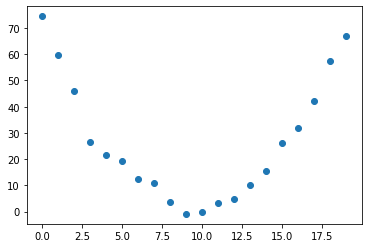

In [35]:
# 확률적 경사하강법을 활용하여 시작부터 끝까지 보여주는 예제

time = torch.arange(0,20).float() # tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])
speed = torch.randn(20)*3 + 0.75 * (time-9.5)**2 + 1
plt.scatter(time,speed)

# speed => tensor([71.3436, 55.7348, 45.5466, 32.5137, 22.7267, 13.6544,  8.5335, 
# 11.6544,  5.2311, -0.8985,  2.1044,  3.5602,  0.3670,  8.0736, 15.0035, 29.3479, 
# 33.2235, 43.0720, 54.9268, 65.1467])



In [36]:
# 파라미터를 조정할 함수의 입력
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In [37]:
# 연속적인 값을 예측하는 회귀문제에서는 일반적으로 평균제곱오차 손실함수를 사용한다.
def mse(pred, target): return ((pred - target)**2).mean()

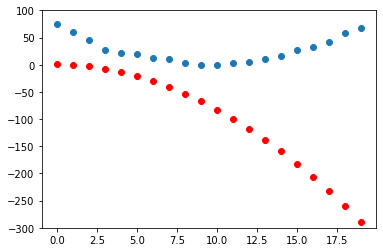

In [38]:
params = torch.randn(3).requires_grad_() # tensor([-0.1335,  0.3415, -0.0716], requires_grad=True)
# randn은 평균이 0이고 표준편차가 1인 정규분포 내에 값들을 크기에 맞게 랜덤으로 부여한다.

preds = f(time, params) # 시간에 따라 값이 점점 더 커지는 모습을 보여준다.

def show_preds(preds, ax=None):
  if ax is None: ax = plt.subplots()[1] # 왜 인덱스 1을 넣어야하는가?
  ax.scatter(time,speed) # 기존의 시간 별 속도 plot
  ax.scatter(time, to_np(preds), color='red') # to_numpy로 예측값을 바꿔준다. 왜 굳이 넘파이로 변환하지?
  ax.set_ylim(-300, 100) # 그래프 y limit

# type(preds) => torch.Tensor
# type(to_np(preds)) => numpy.ndarray
# type(time) => torch.Tensor

show_preds(preds)

In [39]:
loss = mse(preds, speed)
loss

# 다음과 같은 손실평균이 났다.

# loss도 그래프처럼 만들어지는데 여기서 파라미터의 그래디언트를 계산해준다

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [40]:
loss.backward() # 한 번만 실행해주고 그 다음부턴 안됨
params.grad

# tensor([-164.1040,  -10.3645,   -0.7590])

params.grad * 1e-5 # 더 작은 가중치로 조정되었다.

tensor([-0.5320, -0.0342, -0.0025])

In [41]:
# 가중치 갱신하기
lr = 1e-5

params.data -= lr * params.grad.data # 가중치를 조정하고
params.grad = None # 다시 미분값을 없음으로 정의한다.

In [42]:
# 조정확인

preds = f(time, params)
mse(preds, speed) # 오차가 감소하였다.

tensor(5435.5356, grad_fn=<MeanBackward0>)

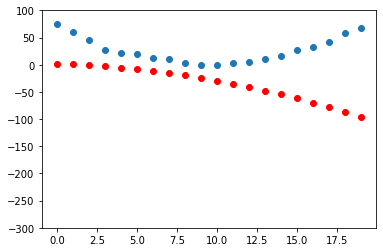

In [43]:
show_preds(preds)

지금까지의 과정을 다시 함수로

In [44]:
def apply_step(params, prn=True):
  preds = f(time, params) # 시간과 파라미터를 곱한 2차함수
  loss = mse(preds, speed) # 예측과 스피드를 제곱평균 손실함수로 계산
  loss.backward() # 손실을 미분가능한 상태로 만들어준 뒤
  params.data -= lr * params.grad.data # 파라미터를 오차율과 그레디언트의 차로 계산함
  params.grad = None
  if prn: print(loss.item()) # 손실의 정도를 출력해주고,
  return preds # 예측값을 반환


In [45]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


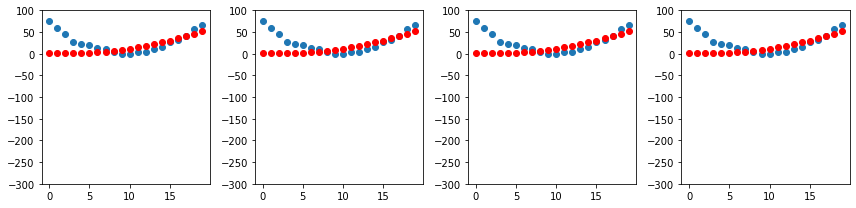

In [46]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

# 4.5 MNIST Loss Function

In [47]:
# 랭크 3의 텐서들을 랭크 2로 재배열
# stacked_threes.shape = [6131, 28, 28]
# stacked_sevens.shape = [6265, 28, 28]

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)


([1] * 10 + [0] * 5) # [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0] 처럼 1차원 텐서로 값이 매겨진다.

train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1) # unsqueeze는 인덱스 x에 차원을 추가한다는 뜻
# 본래 train_y는 1차원 텐서를 가지지만 unsqueeze로 2차원 텐서를 가지게 되었다.

train_x.shape, train_y.shape
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [48]:
dset = list(zip(train_x, train_y)) # 튜플로 묶은 다음 리스트로 나열
x, y = dset[0] # dset 의 형태는 (train_x[0], train_y[0])과 같다.

# x는 784개의 열을 가지지만, y는 단일열이기 때문에 tensor(1)로 나타난다.

x.shape, y, y.shape

(torch.Size([784]), tensor([1]), torch.Size([1]))

In [49]:
# 검증용 데이터셋의 조정

# stacked valid 3 data tensors
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)

valid_x.shape, valid_y.shape
# (torch.Size([2020, 784]), torch.Size([2020, 1]))

valid_dset = list(zip(valid_x, valid_y))

In [88]:
torch.randn((3,3)) # randn((size))를 줌으로 크기에 맞도록 랜덤값을 얻을 수 있다.

# 임의의 초기화된 가중치 만들기
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1)) # 784행, 1열로 된 y의 값에 맞출 가중치 설정

bias = init_params(1) # 파라미터는 가중치 * x + bias 로 형성되어 있다. 픽셀값이 0이라면 곱한 결과도 무조건 0이 되기 때문

weights.shape, bias

(torch.Size([784, 1]), tensor([0.4998], requires_grad=True))

In [51]:
# train_x[0]은 그림 하나를 나타내는 랭크 1의 그림이기 때문에 가중치와 곱하고 모든 값을 더한 뒤 편차를 더한다.

(train_x[0]*weights.T).sum() + bias

tensor([1.5501], grad_fn=<AddBackward0>)

In [52]:
# 행렬 곱으로 train_x와 가중치를 곱한 뒤 편향을 더한다.

def linear1(xb):
  return xb@weights + bias

preds = linear1(train_x)
preds.shape # 총 12396개의 그림
preds

# 행렬 곱셈은.. 머리아프구나..

tensor([[ 1.5501],
        [-5.0415],
        [ 0.0129],
        ...,
        [ 0.8026],
        [ 8.5934],
        [-6.9015]], grad_fn=<AddBackward0>)

In [53]:
corrects = (preds>0.0).float() == train_y 

# float을 하면 false = 0 , true = 1로 할당된다.
# train_y와 같다면 true 아니라면 false
corrects

corrects.float().mean().item()

0.36156824231147766

In [54]:
corrects = (preds>0.0).float()
corrects

tensor([[1.],
        [0.],
        [1.],
        ...,
        [1.],
        [1.],
        [0.]])

In [55]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [56]:
# 가중치를 약간 바꾸면?

with torch.no_grad() : weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

# 기존의 결과와 0.4801549017429352 값 차이가 없다.

0.36156824231147766

In [57]:
trgts = tensor([1,0,1])
preds = tensor([0.9, 0.4, 0.2])

# predictions과 targets의 차이를 측정하는 손실함수

def mnist_loss(prediction, targets):
  return torch.where(targets==1, 1-prediction, prediction).mean()

# no_mean() results = 0.1 , 0.4 , 0.8 
mnist_loss(preds, trgts)

tensor(0.4333)

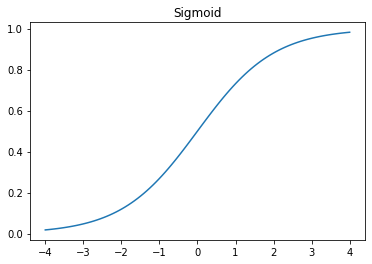

In [58]:
# 0과 1사이의 값을 제공하는 함수 sigmoid 1 / (1 + e^-x)

plot_function(torch.sigmoid, title='Sigmoid', min=-4, max = 4)

In [59]:
preds.sigmoid() # 예측이 0과 1 사이가 아니더라도 손실을 판단 가능하다.

def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean() 

mnist_loss(preds, trgts)

tensor(0.4460)

# Mini batch with SGD

In [60]:
# 최적화를 위해선 데이터의 손실을 파악해야 하는데, 너무 많은 데이터가 있다면 정확도에서는 높은 값을 얻을테지만 시간에 있어서는 오래 걸린다.
# 또 하나의 데이터만 있다면 유의미한 정확도를 뽑아낼 수 없을 것이다.

# 이에 일정 갯수의 데이터만을 가지고 손실을 파악하는데 그러기 위해 일정 값을 뽑아낸 걸 '미니배치학습'이라 하고 미니 배치의 크기를 batch-size

coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [61]:
ds = L(enumerate(string.ascii_lowercase))
ds
# 독립변수, 종속변수 순
# 2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

# string.ascii_lowercase  파이썬에서 제공하는 알파벳

dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

# Start From nothing to end

In [62]:
# 1. 파라미터 초기화

def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

weights.shape, bias, weights.mean()

(torch.Size([784, 1]),
 tensor([-1.2630], requires_grad=True),
 tensor(0.0021, grad_fn=<MeanBackward0>))

In [63]:
# 2. 학습용 DataLoader 생성

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
dset = list(zip(train_x, train_y))

dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [64]:
# 3. 검증용 DataLoader 생성
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

valid_dl = DataLoader(valid_dset, batch_size=256)

In [65]:
# 4. 간단한 배치 만들어서 검증해보기

batch = train_x[:4]
batch.shape # [4, 784]
def linear1(xb):
  return xb@weights + bias

preds = linear1(batch)
preds

# 행렬의 곱
#tensor([[ 9.2829],
#        [12.3698],
#        [ 2.2935],
#        [ 8.1216]], grad_fn=<AddBackward0>)


def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean() 

loss = mnist_loss(preds, train_y[:4]) # 예측과 기존 모델에서의 값과 차이를 비교한다. (4,1) 사이즈
loss

tensor(9.0003e-06, grad_fn=<MeanBackward0>)

In [66]:
# 5. 그레디언트 계산

loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-1.2906e-06), tensor([-9.0000e-06]))

In [67]:
# 6. 그레디언트 함수로 최종 정의

def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()


calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad
# (tensor(-0.0251), tensor([-0.1752]))
# (tensor(-0.0314), tensor([-0.2190])) 자꾸 더해지니까 앞서 계산된 기울기에 더해지는 걸 볼 수 있다. 따라서 이전 그레디언트를 0으로 설정해줘야 한다.

weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [68]:
# 학습루프
def train_epoch(model, lr, params):
  for xb, yb in dl: # 데이터 로드의 두 가지를 나눠서
    calc_grad(xb, yb, model) # 모델을 통해 오차를 계산함
    for p in params:  # 파라미터 안에 가중치와 편향이 들어감 둘다 조정됨
      p.data -= p.grad*lr
      p.grad.zero_()

In [69]:
# 정확도를 측정하기

(preds>0.5).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [70]:
# 배치 단위의 평균정확도 계산

def batch_accuracy(xb , yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [71]:
# 배치 별 구한 평균정확도를 가지고 모든 배치에 대해 평균을 구하는 함수

def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.9854

In [72]:
# 7. 정확도 개선

lr = 1
params = weights, bias
train_epoch(linear1, lr, params) # 가중치 및 편향 조정
validate_epoch(linear1) # 조정된 가중치와 편향으로 학습한 결과에 따라 모든 배치의 정확도 도출

# 정확도가 향상된 걸 볼 수 있다.


0.6323

In [73]:
# 8. 에포크 반복

for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.8325 0.9141 0.9448 0.958 0.9629 0.9663 0.9707 0.9741 0.9761 0.9771 0.9775 0.9785 0.9795 0.9795 0.98 0.98 0.98 0.98 0.98 0.98 

# Make the optimizer

In [74]:
linear_model = nn.Linear(28*28, 1)
linear_model

Linear(in_features=784, out_features=1, bias=True)

In [75]:
w,b = linear_model.parameters()
w.shape, b.shape
 # (torch.Size([1, 784]), torch.Size([1]))



(torch.Size([1, 784]), torch.Size([1]))

In [76]:
# 파라미터정보로 옵티마이저를 정의하는데 활용할 수 있다.

class BasicOptim:
  def __init__(self, params, lr):
    self.params , self.lr = list(params), lr
  def step(self, *args, **kwargs):
    for p in self.params: # 여기에도 역시 가중치와 편향이 들어간다.
      p.data -= p.grad.data * self.lr
  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None

In [77]:
# 파라미터를 넣어서 옵티마이저를 정의한다.
opt = BasicOptim(linear_model.parameters(), lr)

In [78]:
# 학습 루프의 간소화

def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [79]:
validate_epoch(linear_model)

0.4183

In [80]:
# 간소화된 그리고 추상적인 관점에서 전체과정 바라보기

def train_model(model, epoch):
  for i in range(epoch): # 에포크만큼 반복하여 계속 조정한다(3)
    train_epoch(model) # 에포크를 통해 파라미터를 조정하고(1) 
    print(validate_epoch(model), end = ' ') # 조정한 값으로 정확도를 검증한다(2)

In [81]:
train_model(linear_model, 40)

0.4932 0.7563 0.8535 0.918 0.938 0.9507 0.96 0.9663 0.9692 0.9707 0.9731 0.9751 0.9761 0.978 0.9785 0.979 0.9805 0.981 0.9814 0.9814 0.9819 0.9819 0.9824 0.9829 0.9829 0.9829 0.9839 0.9839 0.9844 0.9849 0.9854 0.9854 0.9854 0.9854 0.9854 0.9854 0.9858 0.9858 0.9858 0.9858 

In [89]:
# fastAI에서는 SGD 클래스를 제공하는데 이는 옵티마이저와 같은 방식으로 작동한다.

linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7124 0.8589 0.9204 0.938 0.9526 0.96 0.9673 0.9688 0.9707 0.9731 0.9741 0.9775 0.978 0.979 0.9805 0.9805 0.9805 0.9814 0.9819 

In [90]:
dls = DataLoaders(dl, valid_dl) # 학습용 데이터셋, 검증용 데이터셋을 데이터로드s로 구성한다.
learn = Learner(dls, nn.Linear(28*28, 1), opt_func = SGD, # 데이터로더, 학습 모델, 
                loss_func = mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr = lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637240,0.277676,0.500000,00:00
1,0.417462,0.475034,0.760891,00:00
2,0.157421,0.374498,0.851980,00:00
3,0.071393,0.307312,0.915347,00:00
4,0.039569,0.277045,0.936139,00:00
5,0.027032,0.258915,0.949505,00:00
6,0.021800,0.246501,0.958416,00:00
7,0.019413,0.237350,0.965842,00:00
8,0.018160,0.230182,0.968812,00:00
9,0.017378,0.224297,0.969802,00:00
